In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Read Data

In [2]:
data = pd.read_csv("../data/data_ctrUa4K.csv")

In [3]:
response = "Loan_Status"

# Check Null Values

In [4]:
# check if there are any missing values 
data.isnull().values.any()

True

In [5]:
data.columns[data.isnull().any()].tolist()

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [6]:
print(data["Dependents"].value_counts(),"\n\n", data["Self_Employed"].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

 No     500
Yes     82
Name: Self_Employed, dtype: int64


In [7]:
data['Self_Employed'].head()

0     No
1     No
2    Yes
3     No
4     No
Name: Self_Employed, dtype: object

In [8]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
data['LoanAmount'].mean()

146.41216216216216

In [10]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Replace Null Values According to whats appropriate

In [11]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [12]:
data.columns[data.isnull().any()].tolist()

[]

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# One hot encoding and change variable names

In [15]:
data['Loan_Status'].replace("Y","0", inplace=True)
data['Loan_Status'].replace("N","1", inplace=True)

In [16]:
data["Dependents"] = data["Dependents"].astype(str)

In [17]:
data["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
data["Self_Employed"].replace("No", "not_self_employed", inplace=True)
data["Self_Employed"].replace("Yes", "self_employed", inplace=True)
data["Dependents"].replace("0", "zero_dependents", inplace=True)
data["Dependents"].replace("1", "one_dependent", inplace=True)
data["Dependents"].replace("2", "two_dependents", inplace=True)
data["Dependents"].replace("3+", "more_than_two_dependents", inplace=True)
data["Married"].replace("No", "not_married", inplace=True)
data["Married"].replace("Yes", "married", inplace=True)

In [19]:
data["Loan_Status"].value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

In [20]:
data["Married"].value_counts()

married        401
not_married    213
Name: Married, dtype: int64

In [21]:
data["Credit_History"] = data["Credit_History"].astype(int)
data["Credit_History"] = data["Credit_History"].astype(str)

In [22]:
categorical = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Dependents"]

for i in categorical:
    dums =  pd.get_dummies(data[i], drop_first=True)
    data = pd.concat([data, dums], axis = 1)
    
data.drop(categorical, axis =1, inplace = True)    


In [23]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,not_married,Not Graduate,self_employed,Semiurban,Urban,one_dependent,two_dependents,zero_dependents
0,LP001002,5849,0.0,146.412162,360.0,1,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,LP001003,4583,1508.0,128.000000,360.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,LP001005,3000,0.0,66.000000,360.0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,2583,2358.0,120.000000,360.0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,LP001008,6000,0.0,141.000000,360.0,1,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Check Label

In [24]:
data["Loan_Status"].value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

# divide the data into train and test
# Since each observation is independent random split is fine

In [25]:
response_variable = "Loan_Status"
variables_for_model = ["one_dependent","two_dependents","zero_dependents","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term",
                        "Credit_History","Male","Not Graduate","self_employed","Semiurban","Urban","not_married"]

In [26]:
from sklearn.model_selection import train_test_split
import time

In [27]:
data.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Male',
       'not_married', 'Not Graduate', 'self_employed', 'Semiurban', 'Urban',
       'one_dependent', 'two_dependents', 'zero_dependents'],
      dtype='object')

In [28]:
X = data[variables_for_model].copy()
y = data[response_variable]
columns_for_model = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Create Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
start = time.time()
clf_rf = RandomForestClassifier(n_estimators=100, random_state=12, max_depth = 20, n_jobs = 4)
clf_rf.fit(X_train, y_train)
end = time.time()
print(end - start)

0.19405007362365723


# Check Accuracy of random forest model

In [31]:
y_pred = clf_rf.predict(X_test) 

In [32]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[75  7]
 [23 18]]
             precision    recall  f1-score   support

          0       0.77      0.91      0.83        82
          1       0.72      0.44      0.55        41

avg / total       0.75      0.76      0.74       123



In [33]:
print("Accuracy eval:",metrics.accuracy_score(y_test, y_pred))

Accuracy eval: 0.756097560976


In [34]:
# baseline accuracy 
len(y_pred[y_pred=="1"])/len(y_pred)*100

20.32520325203252

In [35]:
columns_for_model

['one_dependent',
 'two_dependents',
 'zero_dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Male',
 'Not Graduate',
 'self_employed',
 'Semiurban',
 'Urban',
 'not_married']

# Plot Variable Importance 

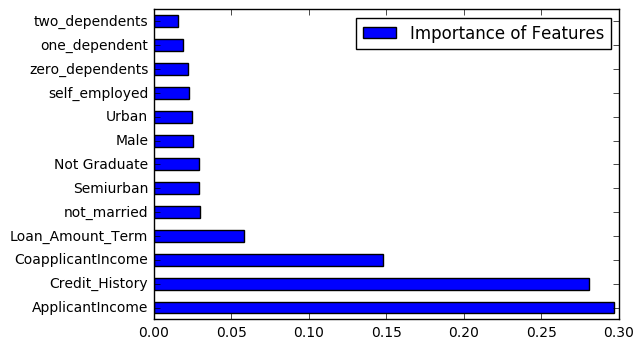

In [36]:
imp = clf_rf.feature_importances_
feat_imp = pd.DataFrame(imp, columns_for_model, columns=['Importance of Features'])
feat_imp = feat_imp.sort_values(by=['Importance of Features'], ascending=False)
feat_imp_frac = feat_imp.head(15)
feat_imp_frac.plot.barh()

# Compared to baseline

In [37]:
random_guess = []
import random
for i in range(len(y_pred)):
    random_guess.append(str(random.randint(0, 1)))    

In [38]:
print(confusion_matrix(y_test, random_guess))  
print(classification_report(y_test, random_guess)) 

[[44 38]
 [19 22]]
             precision    recall  f1-score   support

          0       0.70      0.54      0.61        82
          1       0.37      0.54      0.44        41

avg / total       0.59      0.54      0.55       123



In [39]:
print("Accuracy eval:",metrics.accuracy_score(y_test, random_guess))

Accuracy eval: 0.536585365854
